# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)



In [2]:
# Test openweatherAPI
city = 'martinsville'
target_url = ('http://api.openweathermap.org/data/2.5/weather?q={0}&appid={1}&units=imperial').format(city, weather_api_key)
response = requests.get(target_url).json()
print(response)

{'coord': {'lon': -79.87, 'lat': 36.69}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 54.57, 'feels_like': 54.1, 'temp_min': 53.6, 'temp_max': 55.4, 'pressure': 1023, 'humidity': 100}, 'visibility': 10000, 'wind': {'speed': 3.36, 'deg': 20}, 'clouds': {'all': 90}, 'dt': 1603724315, 'sys': {'type': 1, 'id': 4996, 'country': 'US', 'sunrise': 1603712252, 'sunset': 1603751340}, 'timezone': -14400, 'id': 4771808, 'name': 'Martinsville', 'cod': 200}


## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

622

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Print readout and check to see if city generated returns results from openweatherAPI
city_number = 1
yeet = 0

cities_pd = pd.DataFrame()
cities_pd['City'] = ''
for city in cities:
    target_url = ('http://api.openweathermap.org/data/2.5/weather?q={0}&appid={1}&units=imperial').format(city, weather_api_key)
    response = requests.get(target_url).json()
    time.sleep(1)
    try:
        cities_pd.loc[yeet, 'City'] = response['name']
        print(f'Processing Record {city_number} of Set 1 | {city}')
        city_number = city_number + 1
        yeet = yeet + 1
    except:
        print(f'No data for {city} found!')
        city_number = city_number + 1
        
    


Processing Record 1 of Set 1 | pangnirtung
Processing Record 2 of Set 1 | atuona
Processing Record 3 of Set 1 | alofi
No data for taolanaro found!
Processing Record 5 of Set 1 | vaini
Processing Record 6 of Set 1 | busselton
Processing Record 7 of Set 1 | tasiilaq
Processing Record 8 of Set 1 | vilhena
Processing Record 9 of Set 1 | rikitea
Processing Record 10 of Set 1 | punta arenas
No data for kuche found!
Processing Record 12 of Set 1 | bluff
Processing Record 13 of Set 1 | roma
Processing Record 14 of Set 1 | porto novo
Processing Record 15 of Set 1 | kodiak
Processing Record 16 of Set 1 | nikolskoye
No data for karaul found!
Processing Record 18 of Set 1 | srednekolymsk
Processing Record 19 of Set 1 | voyvozh
Processing Record 20 of Set 1 | unai
Processing Record 21 of Set 1 | hermanus
Processing Record 22 of Set 1 | port lincoln
Processing Record 23 of Set 1 | barrow
Processing Record 24 of Set 1 | ararangua
Processing Record 25 of Set 1 | thompson
Processing Record 26 of Set 1 

Processing Record 201 of Set 1 | vestmannaeyjar
Processing Record 202 of Set 1 | grindavik
Processing Record 203 of Set 1 | talnakh
Processing Record 204 of Set 1 | fortuna
Processing Record 205 of Set 1 | azul
Processing Record 206 of Set 1 | inhambane
Processing Record 207 of Set 1 | tuatapere
Processing Record 208 of Set 1 | pochutla
Processing Record 209 of Set 1 | sitka
Processing Record 210 of Set 1 | kuusamo
Processing Record 211 of Set 1 | saint-joseph
Processing Record 212 of Set 1 | puerto escondido
Processing Record 213 of Set 1 | makat
Processing Record 214 of Set 1 | codrington
Processing Record 215 of Set 1 | timizart
Processing Record 216 of Set 1 | ndele
Processing Record 217 of Set 1 | vao
Processing Record 218 of Set 1 | baruun-urt
Processing Record 219 of Set 1 | kahului
Processing Record 220 of Set 1 | evensk
Processing Record 221 of Set 1 | lebu
Processing Record 222 of Set 1 | ilulissat
Processing Record 223 of Set 1 | mondragone
Processing Record 224 of Set 1 | k

Processing Record 399 of Set 1 | slagelse
Processing Record 400 of Set 1 | teya
Processing Record 401 of Set 1 | zhigansk
Processing Record 402 of Set 1 | taitung
Processing Record 403 of Set 1 | roebourne
Processing Record 404 of Set 1 | solnechnyy
No data for aflu found!
Processing Record 406 of Set 1 | tanout
Processing Record 407 of Set 1 | sorland
Processing Record 408 of Set 1 | ankazobe
Processing Record 409 of Set 1 | whitehorse
Processing Record 410 of Set 1 | bubaque
Processing Record 411 of Set 1 | bukama
Processing Record 412 of Set 1 | dukat
Processing Record 413 of Set 1 | kachiry
Processing Record 414 of Set 1 | nador
No data for umm jarr found!
Processing Record 416 of Set 1 | acapulco
Processing Record 417 of Set 1 | odweyne
Processing Record 418 of Set 1 | mnogovershinnyy
Processing Record 419 of Set 1 | ondangwa
Processing Record 420 of Set 1 | samfya
Processing Record 421 of Set 1 | mananjary
Processing Record 422 of Set 1 | esperance
Processing Record 423 of Set 1 

Processing Record 600 of Set 1 | tamworth
Processing Record 601 of Set 1 | concepcion
No data for ijaki found!
Processing Record 603 of Set 1 | acarau
Processing Record 604 of Set 1 | sulangan
Processing Record 605 of Set 1 | manaus
Processing Record 606 of Set 1 | carnarvon
Processing Record 607 of Set 1 | ambulu
Processing Record 608 of Set 1 | san luis
Processing Record 609 of Set 1 | sola
Processing Record 610 of Set 1 | chimbote
Processing Record 611 of Set 1 | pudozh
Processing Record 612 of Set 1 | kodinsk
Processing Record 613 of Set 1 | namibe
Processing Record 614 of Set 1 | dingle
Processing Record 615 of Set 1 | tahe
Processing Record 616 of Set 1 | cerrito
Processing Record 617 of Set 1 | eureka
Processing Record 618 of Set 1 | spring hill
Processing Record 619 of Set 1 | kassala
Processing Record 620 of Set 1 | singaraja
Processing Record 621 of Set 1 | ekhabi
Processing Record 622 of Set 1 | wuhu


In [5]:
cities_pd

,City
0,Pangnirtung
1,Atuona
2,Alofi
3,Vaini
4,Busselton
...,...
570,Spring Hill
571,Kassala
572,Singaraja
573,Ekhabi


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# Create necessary columns in dataframe for needed data
cities_pd['Lat'] = ''
cities_pd['Lng'] = ''
cities_pd['Max Temp'] = ''
cities_pd['Humidity'] = ''
cities_pd['Cloudiness'] = ''
cities_pd['Wind Speed'] = ''
cities_pd['Country'] = ''
cities_pd['Date'] = ''
cities_pd



,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Pangnirtung,,,,,,,,
1,Atuona,,,,,,,,
2,Alofi,,,,,,,,
3,Vaini,,,,,,,,
4,Busselton,,,,,,,,
...,...,...,...,...,...,...,...,...,...
570,Spring Hill,,,,,,,,
571,Kassala,,,,,,,,
572,Singaraja,,,,,,,,
573,Ekhabi,,,,,,,,


In [7]:
# Populate dataframe with data from openweatherAPI from each city
for index, row in cities_pd.iterrows():
    city = row['City']
    target_url = ('http://api.openweathermap.org/data/2.5/weather?q={0}&appid={1}&units=imperial').format(city, weather_api_key)
    response = requests.get(target_url).json()
    time.sleep(1)
    try:
        cities_pd.loc[index, 'Lat'] = response['coord']['lat']
        cities_pd.loc[index, 'Lng'] = response['coord']['lon']
        cities_pd.loc[index, 'Max Temp'] = response['main']['temp_max']
        cities_pd.loc[index, 'Humidity'] = response['main']['humidity']
        cities_pd.loc[index, 'Cloudiness'] = response['clouds']['all']
        cities_pd.loc[index, 'Wind Speed'] = response['wind']['speed']
        cities_pd.loc[index, 'Country'] = response['sys']['country']
        cities_pd.loc[index, 'Date'] = response['dt']
    except(KeyError):
        print('whoops')

In [8]:
# Convert data in columns to floats
cities_pd.dtypes
cities_pd['Lat'] = cities_pd['Lat'].astype(float)
cities_pd['Lng'] = cities_pd['Lng'].astype(float)
cities_pd['Max Temp'] = cities_pd['Max Temp'].astype(float)
cities_pd['Humidity'] = cities_pd['Humidity'].astype(float)
cities_pd['Cloudiness'] = cities_pd['Cloudiness'].astype(float)
cities_pd['Wind Speed'] = cities_pd['Wind Speed'].astype(float)
cities_pd['Date'] = cities_pd['Date'].astype(float)


cities_pd.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Pangnirtung,66.15,-65.71,21.20,79.0,75.0,6.93,CA,1.603725e+09
1,Atuona,-9.80,-139.03,78.51,74.0,16.0,22.50,PF,1.603725e+09
2,Alofi,-19.06,-169.92,73.89,87.0,100.0,22.50,NU,1.603725e+09
3,Vaini,-21.20,-175.20,69.80,94.0,75.0,8.05,TO,1.603725e+09
4,Busselton,-33.65,115.33,57.99,71.0,0.0,3.49,AU,1.603725e+09


In [9]:
# Use describe to check for irregularities (such as humidity exceeding 100%)
cities_pd.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,575.000000,575.000000,575.000000,575.000000,575.000000,575.000000,5.750000e+02
mean,19.056400,16.215200,60.778470,69.700870,50.991304,8.315861,1.603726e+09
std,33.893231,89.206369,23.586011,22.473389,39.780735,5.603604,2.046717e+02
min,-54.800000,-179.170000,-5.800000,8.000000,0.000000,0.560000,1.603725e+09
25%,-9.975000,-63.745000,45.565000,58.000000,4.000000,3.910000,1.603725e+09
50%,21.400000,20.650000,66.200000,75.000000,55.000000,6.930000,1.603726e+09
75%,48.725000,89.310000,79.470000,85.000000,90.000000,11.410000,1.603726e+09
max,78.220000,179.320000,105.800000,100.000000,100.000000,31.090000,1.603726e+09


In [10]:
# Save dataframe to csv
cities_pd.to_csv('../output_data/city_weather_data.csv', index=False, mode='w')

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [11]:
#  Get the indices of cities that have humidity over 100%.


In [12]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [13]:
# Load data from csv to prevent reruning API calls
df = pd.read_csv('../output_data/city_weather_data.csv')
df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Pangnirtung,66.15,-65.71,21.20,79.0,75.0,6.93,CA,1.603725e+09
1,Atuona,-9.80,-139.03,78.51,74.0,16.0,22.50,PF,1.603725e+09
2,Alofi,-19.06,-169.92,73.89,87.0,100.0,22.50,NU,1.603725e+09
3,Vaini,-21.20,-175.20,69.80,94.0,75.0,8.05,TO,1.603725e+09
4,Busselton,-33.65,115.33,57.99,71.0,0.0,3.49,AU,1.603725e+09
...,...,...,...,...,...,...,...,...,...
570,Spring Hill,28.48,-82.53,82.99,78.0,20.0,10.29,US,1.603726e+09
571,Kassala,15.45,36.40,97.39,14.0,20.0,6.35,SD,1.603726e+09
572,Singaraja,-8.11,115.09,80.33,77.0,100.0,4.41,ID,1.603726e+09
573,Ekhabi,53.51,142.97,40.01,83.0,99.0,14.67,RU,1.603726e+09


## Latitude vs. Temperature Plot

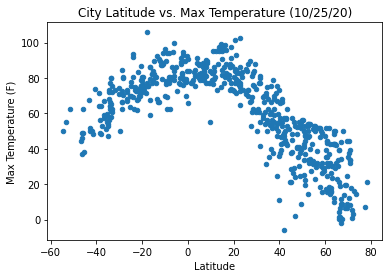

In [41]:
# Create scatter plot illustrating latitude versus temperature
df.plot.scatter('Lat', 'Max Temp', title='City Latitude vs. Max Temperature (10/25/20)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.savefig('../output_data/1.png')
plt.show()


## Latitude vs. Humidity Plot

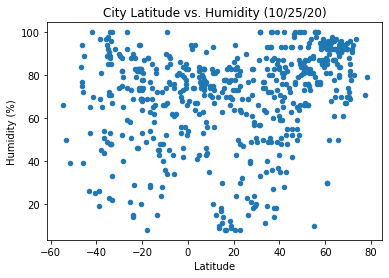

In [47]:
# Create scatter plot illustrating latitude versus humidity
df.plot.scatter('Lat', 'Humidity', title='City Latitude vs. Humidity (10/25/20)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig('../output_data/2.png')
plt.show()


## Latitude vs. Cloudiness Plot

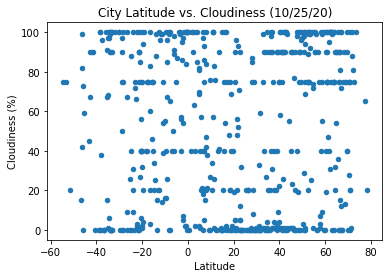

In [43]:
# Create scatter plot illustrating latitude versus cloudiness
df.plot.scatter('Lat', 'Cloudiness', title='City Latitude vs. Cloudiness (10/25/20)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig('../output_data/3.png')
plt.show()

## Latitude vs. Wind Speed Plot

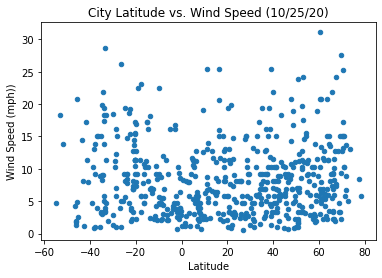

In [44]:
# Create scatter plot illustrating latitude versus wind speed
df.plot.scatter('Lat', 'Wind Speed', title='City Latitude vs. Wind Speed (10/25/20)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph))')
plt.savefig('../output_data/4.png')
plt.show()

## Linear Regression

In [18]:
# y = bx + a, where slope is b is slope of the line and a is the intercept

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [19]:
# Create separate data frames for cities in Northern or Southern Hempisphere
northHem = df.loc[df['Lat'] >= 0]
southHem = df.loc[df['Lat'] < 0]

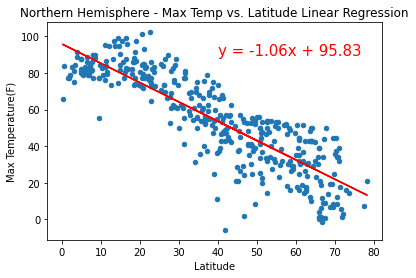

The r-value is: -0.8608872750689548


In [46]:
# Create scatter plot illustrating relationship between max temperature and latitude for cities in the northern hemisphere
slope, intercept, r_value, p_value, std_err = linregress(northHem['Lat'], northHem['Max Temp'])
northHem.plot.scatter('Lat', 'Max Temp', title='Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature(F)')

reg = slope * northHem['Lat'] + intercept
plt.plot(northHem['Lat'], reg, color='r')
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
plt.annotate(line_eq,(40, 90),fontsize=15,color="red")
plt.savefig('../output_data/5.png')
plt.show()
print(f'The r-value is: {r_value}')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

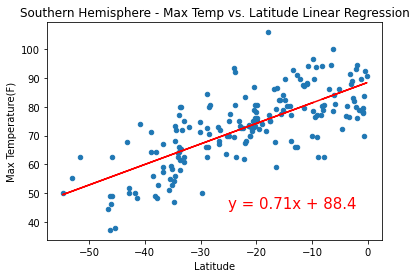

The r-value is: 0.7340617106380446


In [48]:
# Create scatter plot illustrating relationship between max temperature and latitude for cities in the southern hemisphere
slope, intercept, r_value, p_value, std_err = linregress(southHem['Lat'], southHem['Max Temp'])
southHem.plot.scatter('Lat', 'Max Temp', title='Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature(F)')

reg = slope * southHem['Lat'] + intercept
plt.plot(southHem['Lat'], reg, color='r')
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
plt.annotate(line_eq,(-25, 45),fontsize=15,color="red")
plt.savefig('../output_data/6.png')
plt.show()
print(f'The r-value is: {r_value}')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

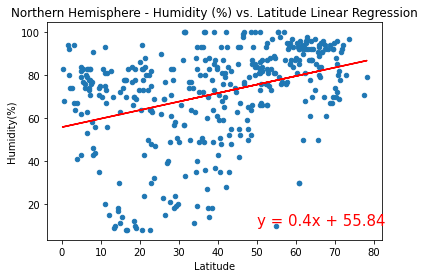

The r-value is: 0.3580603310704175


In [49]:
# Create scatter plot illustrating relationship between humidity and latitude for cities in the northern hemisphere
slope, intercept, r_value, p_value, std_err = linregress(northHem['Lat'], northHem['Humidity'])
northHem.plot.scatter('Lat', 'Humidity', title='Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')

reg = slope * northHem['Lat'] + intercept
plt.plot(northHem['Lat'], reg, color='r')
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
plt.annotate(line_eq,(50, 10),fontsize=15,color="red")
plt.savefig('../output_data/7.png')
plt.show()
print(f'The r-value is: {r_value}')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

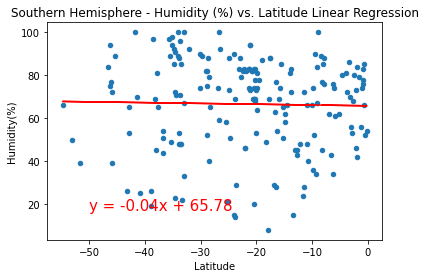

The r-value is: -0.02247487763950812


In [50]:
# Create scatter plot illustrating relationship between humidity and latitude for cities in the southern hemisphere
slope, intercept, r_value, p_value, std_err = linregress(southHem['Lat'], southHem['Humidity'])
southHem.plot.scatter('Lat', 'Humidity', title='Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')

reg = slope * southHem['Lat'] + intercept
plt.plot(southHem['Lat'], reg, color='r')
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
plt.annotate(line_eq,(-50, 17),fontsize=15,color="red")
plt.savefig('../output_data/8.png')
plt.show()
print(f'The r-value is: {r_value}')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

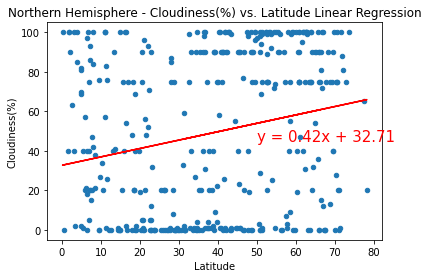

The r-value is: 0.21824895809435546


In [51]:
# Create scatter plot illustrating relationship between cloudiness and latitude for cities in the northern hemisphere
slope, intercept, r_value, p_value, std_err = linregress(northHem['Lat'], northHem['Cloudiness'])
northHem.plot.scatter('Lat', 'Cloudiness', title='Northern Hemisphere - Cloudiness(%) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')

reg = slope * northHem['Lat'] + intercept
plt.plot(northHem['Lat'], reg, color='r')
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
plt.annotate(line_eq,(50, 45),fontsize=15,color="red")
plt.savefig('../output_data/9.png')
plt.show()
print(f'The r-value is: {r_value}')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

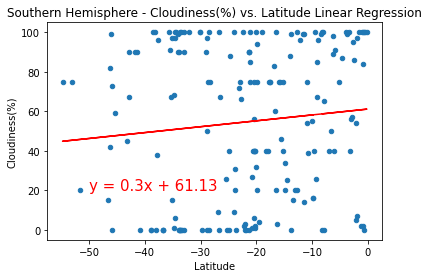

The r-value is: 0.1001566818069707


In [52]:
# Create scatter plot illustrating relationship between cloudiness and latitude for cities in the southern hemisphere
slope, intercept, r_value, p_value, std_err = linregress(southHem['Lat'], southHem['Cloudiness'])
southHem.plot.scatter('Lat', 'Cloudiness', title='Southern Hemisphere - Cloudiness(%) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')

reg = slope * southHem['Lat'] + intercept
plt.plot(southHem['Lat'], reg, color='r')
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
plt.annotate(line_eq,(-50, 20),fontsize=15,color="red")
plt.savefig('../output_data/10.png')
plt.show()
print(f'The r-value is: {r_value}')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

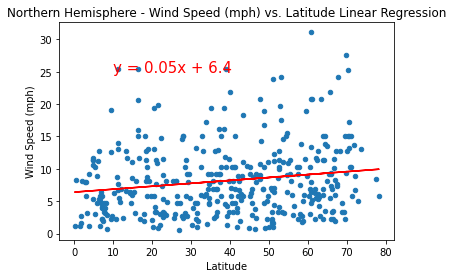

The r-value is: 0.17076183766633987


In [53]:
# Create scatter plot illustrating relationship between wind speed and latitude for cities in the northern hemisphere
slope, intercept, r_value, p_value, std_err = linregress(northHem['Lat'], northHem['Wind Speed'])
northHem.plot.scatter('Lat', 'Wind Speed', title='Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

reg = slope * northHem['Lat'] + intercept
plt.plot(northHem['Lat'], reg, color='r')
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
plt.annotate(line_eq,(10, 25),fontsize=15,color="red")
plt.savefig('../output_data/11.png')
plt.show()
print(f'The r-value is: {r_value}')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

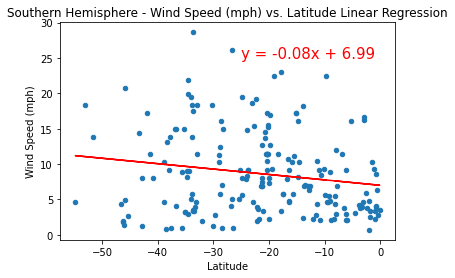

The r-value is: -0.17027694973567895


In [54]:
# Create scatter plot illustrating relationship between wind speed and latitude for cities in the southern hemisphere
slope, intercept, r_value, p_value, std_err = linregress(southHem['Lat'], southHem['Wind Speed'])
southHem.plot.scatter('Lat', 'Wind Speed', title='Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

reg = slope * southHem['Lat'] + intercept
plt.plot(southHem['Lat'], reg, color='r')
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
plt.annotate(line_eq,(-25, 25),fontsize=15,color="red")
plt.savefig('../output_data/12.png')
plt.show()
print(f'The r-value is: {r_value}')

In [ ]:
# Three observable trends:
# Max temperature rises as you come closer to the equator.
# The nothern hemisphere has a sharper change in max temperature as you move away from the equator.
# Location does not seem to have any bearing on cloudiness.